<a href="https://colab.research.google.com/github/Parasavarshini/FMML_LAB_1/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

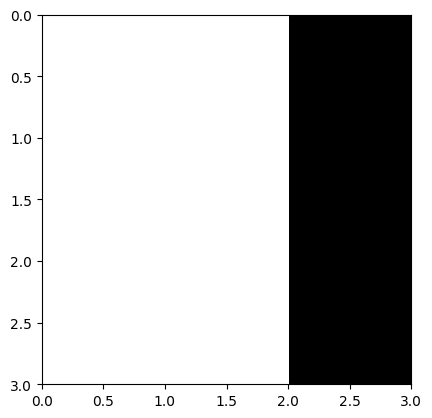

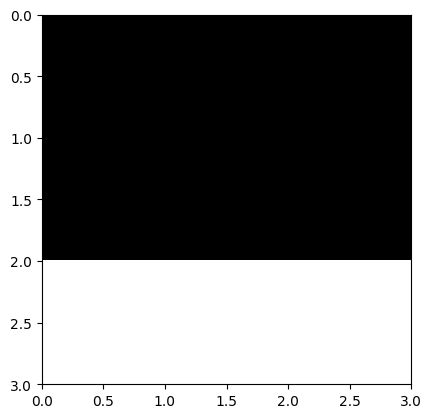

In [11]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [12]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [13]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [14]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

TypeError: Image data of dtype object cannot be converted to float

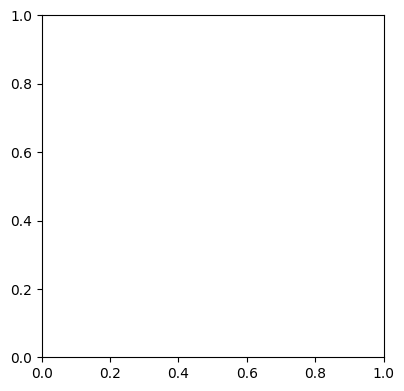

In [23]:
import matplotlib.pyplot as plt

# Assuming image, out1, and out2 are defined earlier in your code

fig = plt.figure(figsize=(15, 5))

# Original Image
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax.axis('off')

# Horizontal Edge
ax = fig.add_subplot(1, 3, 2)
ax.imshow(out1, cmap='gray')
ax.set_title('Horizontal Edge')
ax.axis('off')

# Vertical Edge
ax = fig.add_subplot(1, 3, 3)

# Check if out2 has 4 channels and convert to RGB if necessary
if len(out2.shape) == 3 and out2.shape[0] == 4:
    out2 = out2.transpose((1, 2, 0))

ax.imshow(out2, cmap='gray')
ax.set_title('Vertical Edge')
ax.axis('off')

# Display the figure
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [24]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 52649376.67it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [26]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [27]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [28]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [29]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [31]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [32]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [33]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0130, Accuracy: 38.5640
Epoch 2/5, Loss: 0.0093, Accuracy: 58.0020
Epoch 3/5, Loss: 0.0077, Accuracy: 65.5180
Epoch 4/5, Loss: 0.0066, Accuracy: 70.3120
Epoch 5/5, Loss: 0.0056, Accuracy: 74.4500


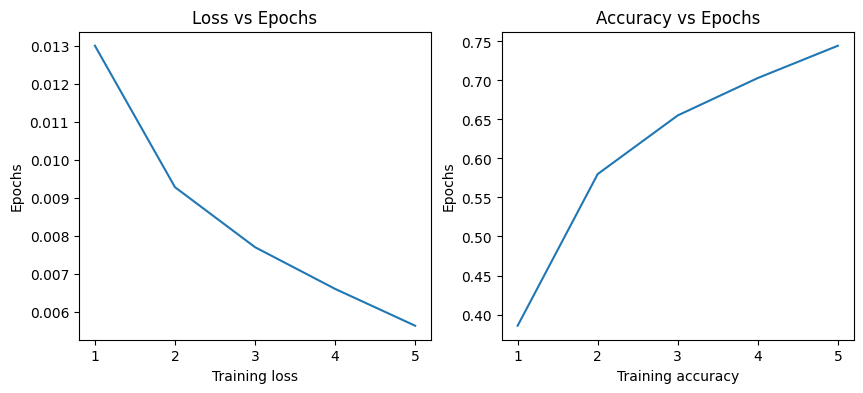

In [34]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [35]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 66 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


answer 1:-

Convolutional Neural Networks (CNNs) are preferred over traditional Artificial Neural Networks (ANNs) for image classification tasks due to several reasons:

Feature Learning: CNNs automatically learn hierarchical representations of features from raw pixel values. Convolutional layers capture low-level features like edges and textures, while deeper layers learn more abstract and high-level features relevant to the task.

Translation Invariance: CNNs exploit the spatial structure of images by using weight sharing and local connectivity. This allows them to be translation invariant, meaning they can recognize objects regardless of their location within the image.

Parameter Efficiency: CNNs have a smaller number of parameters compared to fully connected ANNs, as they share weights across spatial locations. This parameter efficiency enables CNNs to handle high-dimensional inputs like images without requiring an impractical number of parameters.

Sparse Connectivity: In CNNs, each neuron is connected to only a small local region of the input volume, unlike fully connected ANNs where each neuron is connected to every neuron in the previous layer. This sparse connectivity reduces the number of parameters and computations required, making CNNs more scalable.

Pooling Layers: CNNs often include pooling layers, which downsample feature maps by summarizing local information. Pooling helps to reduce spatial dimensions, decrease computational complexity, and make the network more robust to spatial translations and distortions.

Convolutional Filters: CNNs use convolutional filters to extract local patterns from the input. These filters are typically small in size and learnable, allowing the network to capture spatial hierarchies of features efficiently.

Regularization: CNN architectures often include regularization techniques like dropout and weight decay, which help prevent overfitting by reducing the network's capacity to memorize the training data.

Pretrained Models: Pretrained CNN models, such as those trained on ImageNet, provide a valuable starting point for transfer learning. By fine-tuning these pretrained models on specific image classification tasks, developers can achieve good performance with limited labeled data and computational resources.

Overall, CNNs are specifically designed to handle spatial data like images and have demonstrated superior performance compared to traditional ANNs in various computer vision tasks, making them the preferred choice for image classification.








answer 2:-

Improving the performance of a Convolutional Neural Network (CNN) involves tuning several hyperparameters such as the number of epochs, choice of optimizer, learning rate, batch size, network architecture, and regularization techniques. Here's a general approach to tuning these hyperparameters:

Number of Epochs: Increase the number of epochs gradually until the model starts to overfit the training data. Monitor the validation loss to determine when to stop training.

Optimizer: Try different optimizers such as Adam, RMSprop, or SGD with momentum. Each optimizer has its advantages depending on the dataset and the model architecture.

Learning Rate (LR): Experiment with different learning rates. Start with a relatively large learning rate and decrease it gradually during training using learning rate schedules or adaptive learning rate methods like Adam.

Batch Size: Adjust the batch size to balance between computational efficiency and model performance. Smaller batch sizes may help the model generalize better, but larger batch sizes can speed up training.

Network Architecture: Experiment with different CNN architectures, including the number of layers, the number of filters in each layer, kernel sizes, and the use of skip connections or residual connections.

Regularization: Apply dropout, L2 regularization, or batch normalization to prevent overfitting.

Data Augmentation: Augment the training data with transformations such as rotation, flipping, scaling, and cropping to increase the diversity of the training set and improve generalization.

Transfer Learning: Utilize pretrained CNN models and fine-tune them on your dataset, especially if you have limited training data.

Once you've decided on the hyperparameters to tune, you can use techniques like grid search, random search, or Bayesian optimization to find the optimal combination of hyperparameters.

After tuning the hyperparameters, evaluate the model's performance on a separate test dataset to report the improved test accuracy.

Here's a sample code snippet for tuning hyperparameters and evaluating the CNN's performance:

python
Copy code
# Pseudocode for hyperparameter tuning and evaluation

# Define hyperparameters to tune
hyperparameters = {
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search or random search
for params in itertools.product(*hyperparameters.values()):
    # Train CNN with current hyperparameters
    model = build_cnn_model(**dict(zip(hyperparameters.keys(), params)))
    model.fit(train_data, train_labels, validation_data=(val_data, val_labels), verbose=0)
    
    # Evaluate model on test dataset
    test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
    
    # Update best accuracy and hyperparameters if current model is better
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_hyperparameters = params

# Report the improved test accuracy and best hyperparameters
print("Improved Test Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_hyperparameters)
This code snippet demonstrates a basic grid search approach for tuning hyperparameters and evaluating the CNN's performance on a test dataset. You can modify it based on your specific requirements and dataset characteristics.








answer 3:-Reducing the number of convolutional layers in a Convolutional Neural Network (CNN) to only one can have several implications:

1. **Reduced Capacity for Feature Extraction**: With only one convolutional layer, the network has limited capacity to extract complex features from the input images. The single layer can only capture simple patterns and may struggle to learn more abstract and high-level features necessary for accurate classification.

2. **Loss of Hierarchical Representation**: CNNs typically consist of multiple convolutional layers stacked on top of each other, with each layer capturing increasingly abstract features. By reducing the number of layers to one, the network loses the ability to learn hierarchical representations of features, which are crucial for understanding the underlying structure of the data.

3. **Limited Model Expressiveness**: A single convolutional layer may not be expressive enough to capture the full complexity of real-world image datasets. Deep CNN architectures with multiple layers have shown superior performance in various computer vision tasks due to their ability to learn intricate representations of visual information.

4. **Increased Sensitivity to Input Variations**: With fewer layers, the network may become more sensitive to variations in input images, such as changes in viewpoint, lighting conditions, and occlusions. This increased sensitivity can lead to poorer generalization performance and higher susceptibility to overfitting.

5. **Difficulty in Learning Discriminative Features**: Convolutional layers are responsible for learning spatial hierarchies of features that are discriminative for the task at hand. With only one convolutional layer, the network may struggle to learn a diverse set of features that effectively differentiate between different classes in the dataset.

Overall, reducing the number of convolutional layers to only one severely limits the representational power and learning capacity of the CNN, which can significantly impact its performance on image classification tasks. It's generally recommended to use deeper architectures with multiple convolutional layers to achieve better results.

answer3:-

In the last layer of a Convolutional Neural Network (CNN) used for image classification, the softmax activation function is often used. However, there are cases where softmax may not be necessary or appropriate:

1. **Binary Classification**: If the task is binary classification (i.e., only two classes), it's common to use a single neuron in the output layer with a sigmoid activation function instead of softmax. The sigmoid function squashes the output between 0 and 1, representing the probability of belonging to one class, while softmax is typically used when there are more than two classes.

2. **Multi-label Classification**: In multi-label classification, where each input can belong to multiple classes simultaneously, softmax may not be suitable. Softmax assumes that each input belongs to exactly one class by assigning probabilities to mutually exclusive classes. Instead, a sigmoid activation function is used for each output neuron to independently predict the presence or absence of each class.

3. **Regression Tasks**: In some cases, CNNs are used for regression tasks where the goal is to predict continuous values rather than class labels. In such tasks, the output layer may have a single neuron without any activation function or a linear activation function like ReLU or identity.

4. **Custom Output Layers**: Depending on the specific requirements of the task or the architecture of the CNN, custom output layers may be designed without softmax. For example, in some architectures, a softmax layer may be followed by additional processing layers or custom post-processing steps, making softmax unnecessary in the final layer.

Overall, the choice of activation function in the last layer of a CNN depends on the nature of the task (classification or regression), the number of classes, and any specific requirements or constraints of the problem. While softmax is commonly used for multi-class classification tasks, it's not a strict requirement and may be replaced with other activation functions depending on the context.